In [72]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

INPUT_FILE = os.path.join("input", "ks-projects-201801.csv")
REPORT_FILE = os.path.join("output","profile.html")
GENERATE_REPORT = False

raw_data = pd.read_csv(INPUT_FILE)
raw_data.head()

# creating a copy of the original data to ensure integrity of input data
data = raw_data.copy()
data.head()


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [26]:
df = pd.DataFrame(data, columns=['main_category', 'goal'])
df1 = pd.DataFrame(data, columns=['main_category', 'pledged', 'goal'])

df['percent'] = (df['goal'] / df['goal'].sum()) * 100
#df
df1['percent'] = (df1['pledged'] / df1['goal']) * 100

percentage = df1.sort_values(['main_category', 'percent'], ascending=False).groupby('main_category').head(5)
percentage

,main_category,pledged,goal,percent
92271,Theater,1155.00,1.00,115500.0
74545,Theater,1100.00,1.00,110000.0
347517,Theater,100.00,1.00,10000.0
73831,Theater,451.00,5.00,9020.0
302609,Theater,65.00,1.00,6500.0
...,...,...,...,...
285408,Art,27588.23,1.00,2758823.0
304489,Art,100.00,0.01,1000000.0
11384,Art,834.00,1.00,83400.0
33356,Art,796.00,1.00,79600.0


In [28]:
#average goal
df.mean()

/Users/kevinkrips/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


goal       49080.791521
percent        0.000264
dtype: float64

In [30]:
#calculating the amount of successful campaigns
def success (campaign):
    if campaign["state"] == 'successful':
        return "Yes"
    else:
        return "No"

data['successful'] = data.apply(success, axis=1)
data['successful'].value_counts(sort= False, normalize=True).round(3) * 100

No     64.6
Yes    35.4
Name: successful, dtype: float64

('Publishing', 6.25)
('Film & Video', 28.85)
('Music', 4.49)
('Food', 6.45)
('Design', 7.56)
('Crafts', 0.55)
('Games', 9.61)
('Comics', 1.18)
('Fashion', 3.05)
('Theater', 1.62)
('Art', 6.18)
('Photography', 0.75)
('Technology', 20.98)
('Dance', 0.21)
('Journalism', 2.27)


TypeError: object of type 'numpy.float32' has no len()

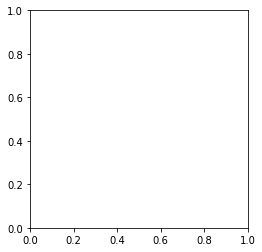

In [78]:
df2 = pd.DataFrame(data, columns=['main_category', 'goal', 'pledged'])

#list theater values
#theater = df2.loc[df2['main_category'] == 'Theater']

categories = pd.unique(df2['main_category'])

# list amount of projects of each unique main_category
pd.value_counts(df2['main_category']) 
sum_total = df2['goal'].sum()

for i in categories:
    df_i = df[df['main_category']==i]
    #shows total funding for each category
    #print (i, df_i['goal'].sum()) 
    df3 = (df_i['goal'].sum() / sum_total) * 100
    df4 = i, df3.round(2)
    print (df4)

colors = sns.color_palette('pastel')[0:5]
plt.pie(df3, labels = i, colors = colors, autopct='%.0f%%')
plt.show()



